# Setup


In [1]:
import numpy as np
import utils


## Loading the image


Reading image: images/input/defective-weld.png (482x566)


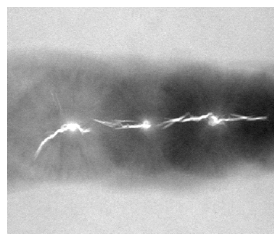

In [2]:
image = utils.read_image("defective-weld.png")
utils.show_image(image)


# Task 2b

Implement a function that segments a grayscale image using the region growing method outlined below.

> Region growing is a region-based segmentation algorithm that uses a set of seed points and a homogeneity criteria $H(R_i)$ to perform segmentation. For each seed point, a region is grown by inspecting neighboring pixels and evaluating whether or not to include them in region $R_i$ using $H(R_i)$. The neighboring pixels that are currently being evaluated are typically called _candidate pixels_. The growing of a region stops when there are no more candidate pixels to inspect. The simplest homogeneity criteria is a threshold, where the threshold defines the maximum absolute difference in intensity between the seed point and the current candidate pixel.

Use a Moore neighborhood (8-connectedness) to expand your set of candidate pixels around each seed point.

Apply it on the image "defective-weld.png". Use the 4 seed points given in the starter code and use a pixel intensity threshold of 50.


In [3]:
intensity_threshold = 50
seed_points = [
    [254, 138],
    [253, 296],
    [233, 436],
    [232, 417],
]


In [4]:
def moore_neighboorhood(x: int, y: int) -> list:
    """Creates a list of points connected to (x, y) using 8-connectedness"""
    connected = []
    for delta_x in [-1, 0, 1]:
        for delta_y in [-1, 0, 1]:
            if (delta_x, delta_y) != (0, 0):
                connected.append((x + delta_x, y + delta_y))
    return connected


def region_growing(
    image: np.ndarray, seed_points: "list[tuple]", intensity_threshold: int
) -> np.ndarray:
    
    image = image.astype(float)
    rows, columns = image.shape
    segmented = np.zeros((rows, columns), dtype=bool)

    # Go through all seedpoints
    for seed in seed_points:

        # each seed has its own active_front and "seed-value" (starting intensity)
        active_front = [seed]
        seed_value = image[seed[0], seed[1]]

        # keep checking and adding neighbors while active_front isn't empty
        while active_front:
            # remove first element and set that pixel to 1 in output image
            row, column = active_front.pop(0)
            segmented[row, column] = 1

            for candidate_row, candidate_column in moore_neighboorhood(row, column):
                if not (0 <= candidate_row < rows and 0 <= candidate_column < columns):
                    # Outside dimensions of image
                    continue
                if segmented[candidate_row, candidate_column] != 0:
                    # Already checked
                    continue

                if (abs(image[candidate_row, candidate_column] - seed_value) < intensity_threshold):
                    # pixel is within threshold, add it to active_front
                    active_front.append((candidate_row, candidate_column))
                    segmented[candidate_row, candidate_column] = -1

    return segmented


## Testing the function


Saving image to: images/output/task2b.png


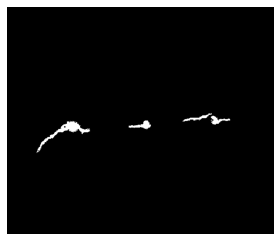

In [5]:
segmented_image = region_growing(image, seed_points, intensity_threshold)

assert (
    segmented_image.shape == image.shape
), f"Expected image shape ({image.shape}) to be same as threshold image shape ({segmented_image.shape})"
assert (
    segmented_image.dtype == np.bool
), f"Expected segmented image dtype to be np.bool. Was: {segmented_image.dtype}"

utils.show_image(segmented_image, save_as="task2b.png")
